In [50]:
import ase.io
from ase.io import read, write
from tqdm import tqdm 

from pathlib import Path
import pickle
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [51]:
!pwd

/mnt/c/Users/user/OneDrive/桌面/nequip_project/allegro


In [53]:
from nequip.ase import NequIPCalculator
calc = NequIPCalculator.from_deployed_model(
    model_path="../../evan_project/evaluation_files/allegroLLZO_200epoch.pth",
    species_to_type_name = {
        "Al": "Al",
        "La": "La",
        "Li": "Li",
        "O": "O",
        "Zr": "Zr",
    },
    set_global_options = True
)

In [54]:
# Generate orginal and predicted energy and force
e_l = []
f_l = []

e_l_p = []
f_l_p = []

with tqdm(total=200) as pbar:
      for i in range(200):
            # Orginal
            atoms = ase.io.read('../../evan_project/evaluation_files/OUTCAR_30', index = i)
            num = len(atoms)
            eng_N = atoms.get_potential_energy()/num
            f_z = atoms.get_forces()
            e_l.append(eng_N)
            f_l.append(f_z)

            # Apply calculator
            atoms.calc = calc
            eng_N = atoms.get_potential_energy()/num
            f_z = atoms.get_forces()
            e_l_p.append(eng_N)
            f_l_p.append(f_z)

            pbar.update(1)

print(f'{len(e_l)} steps in original data are counted')
print(f'{len(e_l_p)} steps in predicted data are counted')

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [29:06<00:00,  8.73s/it]

200 steps in original data are counted
200 steps in predicted data are counted


In [55]:
dic = {'e_l':e_l, 'e_l_p':e_l_p, 'f_l':f_l, 'f_l_p':f_l_p}
pth = Path('../../evan_project/evaluation_files/predict_data')/ '30_all_1500_200.pkl'

In [56]:
def savedata(dic, pth):
     with pth.open('wb') as f:
        pickle.dump(dic, f)


def loaddata(pth):
      with pth.open('rb') as f:
        dic = pickle.load(f)
        e_l = dic['e_l']
        e_l_p = dic['e_l_p']
        f_l = dic['f_l']
        f_l_p = dic['f_l_p']
        return e_l, e_l_p, f_l, f_l_p

In [58]:
savedata(dic,pth)

In [59]:
e_l = []
f_l = []

e_l_p = []
f_l_p = []
e_l, e_l_p, f_l, f_l_p = loaddata(pth)

In [60]:
e_rmse = round(sqrt(mean_squared_error(e_l, e_l_p)), 5)
f_rmse = round(sqrt(mean_squared_error(np.array(f_l).flatten(), np.array(f_l_p).flatten())), 5)
print(f'e/N_rmse = {e_rmse}')
print(f'e/N_rmse = {f_rmse}')

e/N_rmse = 0.04907
e/N_rmse = 0.05851


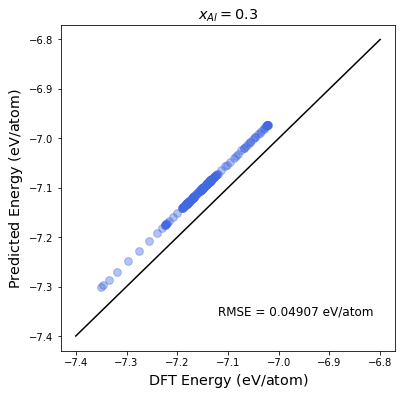

In [63]:
size = 'x-large'
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(e_l, e_l_p, c = 'royalblue', s=60, alpha=0.4)
ax.plot([-7.4, -6.8], [-7.4, -6.8], c='black')
plt.title(r'$x_{Al}=0.3$', size = size)
plt.ylabel('Predicted Energy ($\mathrm{eV/atom}$)', size = size)
plt.xlabel('DFT Energy ($\mathrm{eV/atom}$)', size = size);  
plt.text(0.85, 0.2, f"RMSE = {e_rmse} eV/atom", transform=plt.gcf().transFigure, ha="right", va="bottom", fontsize=12);

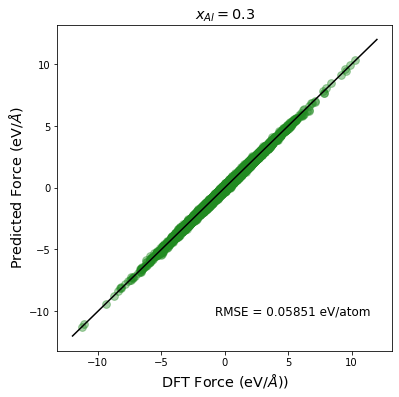

In [64]:
size = 'x-large'
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(f_l, f_l_p, c = 'forestgreen', s=60, alpha=0.4)
ax.plot([-12, 12], [-12, 12], c='black')
plt.title(r'$x_{Al}=0.3$', size = size)
plt.ylabel('Predicted Force (eV/$\AA$)', size = size)
plt.xlabel('DFT Force (eV/$\AA$))', size = size);  
plt.text(0.85, 0.2, f"RMSE = {f_rmse} eV/atom", transform=plt.gcf().transFigure, ha="right", va="bottom", fontsize=12);

In [22]:
!nequip-deploy build --train-dir LLZO_la3d_Al20_1500 allegro1500_LLZO-deployed.pth

INFO:root:Loading best_model from training session...
Traceback (most recent call last):
  File "/home/william0925/anaconda3/bin/nequip-deploy", line 8, in <module>
    sys.exit(main())
  File "/home/william0925/anaconda3/lib/python3.9/site-packages/nequip/scripts/deploy.py", line 203, in main
    config = Config.from_file(str(args.train_dir / "config.yaml"))
  File "/home/william0925/anaconda3/lib/python3.9/site-packages/nequip/utils/config.py", line 260, in from_file
    dictionary = load_file(
  File "/home/william0925/anaconda3/lib/python3.9/site-packages/nequip/utils/savenload.py", line 259, in load_file
    raise OSError(f"file {filename} at {abs_path} is not found")
OSError: file LLZO_la3d_Al20_1500/config.yaml at /mnt/c/Users/user/OneDrive/桌面/nequip_project/allegro/LLZO_la3d_Al20_1500/config.yaml is not found
